<a href="https://colab.research.google.com/github/AbiramiMuthu/Tensorflow-CNN-Malaria_Parasite_Classification/blob/main/TF_CNN_Malaria_parasite_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Malaria Parasite classification using CNN

Cloned the Dataset from the github repo, The dataset is avaiable in Kaggle.

In [ ]:
! git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git


Cloning into 'Malaria-Classification-Using-CNN'...
remote: Enumerating objects: 27577, done.
remote: Total 27577 (delta 0), reused 0 (delta 0), pack-reused 27577
Receiving objects: 100% (27577/27577), 331.67 MiB | 39.01 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (27562/27562), done.


### Load Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Load the Train and the Validation generator

In [ ]:
img_width,img_height=(64,64)

In [ ]:
imagegen=ImageDataGenerator(rescale=1/255.0,validation_split=0.2)

In [ ]:
train_generator=imagegen.flow_from_directory("/content/Malaria-Classification-Using-CNN/malaria-dataset",
                                             target_size=(img_width,img_height),
                                             class_mode='binary',
                                             batch_size=16,
                                             subset='training')

Found 22048 images belonging to 2 classes.


In [ ]:
test_generator=imagegen.flow_from_directory("/content/Malaria-Classification-Using-CNN/malaria-dataset",
                                             target_size=(img_width,img_height),
                                             class_mode='binary',
                                             batch_size=16,
                                             subset='validation')

Found 5510 images belonging to 2 classes.


In [ ]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
train_generator.image_shape

(64, 64, 3)

## Build the Model

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)             

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## Train the Model

In [ ]:
history=model.fit_generator(train_generator,
                            steps_per_epoch=len(train_generator),
                            epochs=10,
                            validation_data=test_generator,
                            validation_steps=len(test_generator))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1378/1378 [==============================] - 61s 21ms/step - loss: 0.4968 - accuracy: 0.7652 - val_loss: 0.2198 - val_accuracy: 0.9250
Epoch 2/10
1378/1378 [==============================] - 29s 21ms/step - loss: 0.2382 - accuracy: 0.9215 - val_loss: 0.1860 - val_accuracy: 0.9368
Epoch 3/10
1378/1378 [==============================] - 28s 20ms/step - loss: 0.2103 - accuracy: 0.9292 - val_loss: 0.1730 - val_accuracy: 0.9403
Epoch 4/10
1378/1378 [==============================] - 28s 20ms/step - loss: 0.1925 - accuracy: 0.9361 - val_loss: 0.1848 - val_accuracy: 0.9303
Epoch 5/10
1378/1378 [==============================] - 28s 21ms/step - loss: 0.1720 - accuracy: 0.9459 - val_loss: 0.1681 - val_accuracy: 0.9434
Epoch 6/10
1378/1378 [==============================] - 29s 21ms/step - loss: 0.1626 - accuracy: 0.9496 - val_loss: 0.1732 - val_accuracy: 0.9365
Epoch 7/10
1378/1378 [==============================] - 29s 21ms/step - loss: 0.1564 - accuracy: 0.9511 - val_loss: 0.2277 -

In [ ]:
history.history

{'accuracy': [0.7652394771575928,
  0.9214894771575928,
  0.9291999340057373,
  0.9361393451690674,
  0.9459361433982849,
  0.9495645761489868,
  0.9510613083839417,
  0.9526033997535706,
  0.955460786819458,
  0.9575471878051758],
 'loss': [0.49682050943374634,
  0.23816624283790588,
  0.21025340259075165,
  0.19254910945892334,
  0.17197342216968536,
  0.16260641813278198,
  0.15638738870620728,
  0.14751510322093964,
  0.1380523443222046,
  0.13449515402317047],
 'val_accuracy': [0.925045371055603,
  0.9368420839309692,
  0.9402903914451599,
  0.9303085207939148,
  0.9433757066726685,
  0.9364791512489319,
  0.9108892679214478,
  0.940653383731842,
  0.9402903914451599,
  0.9313974380493164],
 'val_loss': [0.2197682112455368,
  0.1859574317932129,
  0.17297978699207306,
  0.1847943514585495,
  0.16808342933654785,
  0.17316700518131256,
  0.22768057882785797,
  0.16928115487098694,
  0.17319849133491516,
  0.20207904279232025]}

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

## Loss and Accuracy Curve

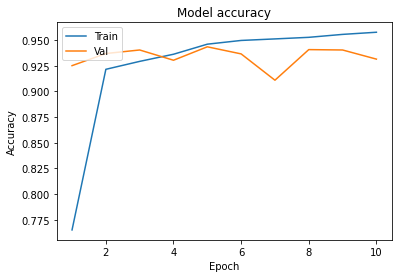

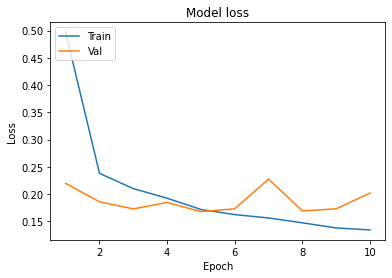

In [ ]:
plot_learningCurve(history, 10)